# Cats vs. Dogs

We will be building a convolutional neural network model for cats and dogs classification. This project uses the Microsoft Cats vs. Dogs dataset. This is the link to the dataset: https://www.microsoft.com/en-us/download/details.aspx?id=54765

## Getting started

### Deleting existing files and folders

In [1]:
!rm -rf PetImages/ logs/
!rm X.pickle y.pickle

### Downloading our dataset

In [2]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2023-02-12 17:09:09--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.97.45.22, 2600:1409:9800:98c::317f, 2600:1409:9800:984::317f
Connecting to download.microsoft.com (download.microsoft.com)|104.97.45.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   230MB/s    in 3.8s    

2023-02-12 17:09:13 (205 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



### Unzipping our dataset

In [3]:
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

### Deleting unnecessary files in our workspace

In [4]:
!rm kagglecatsanddogs_5340.zip CDLA-Permissive-2.0.pdf readme[1].txt

### Installing the required libraries

In [5]:
!pip install numpy matplotlib opencv-python scikit-learn tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data preprocessing

### Importing the required libraries

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import pickle

### Visualizing an example image in the dataset

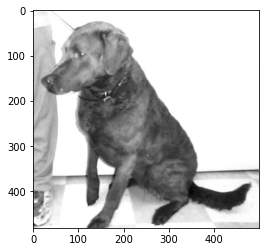

(482, 500)


In [7]:
DATA_DIR = "./PetImages/"
categories = ["Dog", "Cat"]

for category in categories:
    path = os.path.join(DATA_DIR, category)
    for image in os.listdir(path):
        image_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
        plt.imshow(image_array, cmap="gray")
        plt.show()
        break
    break
print(image_array.shape)

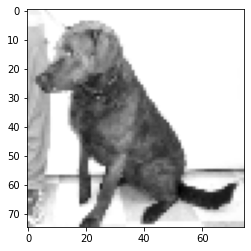

In [8]:
image_size = 75
new_image_array = cv2.resize(image_array, (image_size, image_size))
plt.imshow(new_image_array, cmap="gray")
plt.show()

### Resizing the images in the dataset

In [9]:
training_data = []
def create_training_data():
    for category in categories:
        path = os.path.join(DATA_DIR, category)
        class_category = categories.index(category)
        for image in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
                resized_image = cv2.resize(image_array, (image_size, image_size))
                training_data.append([resized_image, class_category])
            except Exception as e:
                pass
create_training_data()
print(len(training_data))
random.shuffle(training_data)

24946


### Storing the pre-processed images in a `pickle` file

Pre-processing the data takes a significantly long period time. This slows down our iteration process. Hence the data will be imported from the `pickle` file. This is easier to work with and takes less time to import.

In [10]:
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, image_size, image_size, 1)

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

## Building the model

### Importing the required libraries

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
import time

### Configuring the log files for TensorBoard

These log files will be helpful when exploring the model with TensorBoard.

In [12]:
NAME = "Cats_vs_Dogs-CNN-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

### Importing the data

In [13]:
X = np.array(pickle.load(open("X.pickle", "rb")))
y = np.array(pickle.load(open("y.pickle", "rb")))
X = X / 255.0
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.1, random_state=1234)

### Building and training the model

In [14]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dense(1))
model.add(Activation("sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_validation, y_validation), callbacks=[tensorboard])

Epoch 1/5
702/702 [==============================] - 17s 13ms/step - loss: 0.5989 - accuracy: 0.6692 - val_loss: 0.5150 - val_accuracy: 0.7515
Epoch 2/5
702/702 [==============================] - 7s 9ms/step - loss: 0.4874 - accuracy: 0.7639 - val_loss: 0.4661 - val_accuracy: 0.7884
Epoch 3/5
702/702 [==============================] - 6s 9ms/step - loss: 0.4400 - accuracy: 0.7924 - val_loss: 0.4457 - val_accuracy: 0.7956
Epoch 4/5
702/702 [==============================] - 7s 9ms/step - loss: 0.4016 - accuracy: 0.8149 - val_loss: 0.4319 - val_accuracy: 0.7972
Epoch 5/5
702/702 [==============================] - 6s 9ms/step - loss: 0.3547 - accuracy: 0.8379 - val_loss: 0.4398 - val_accuracy: 0.8024


In [15]:
!tensorboard --logdir=logs/

2023-02-12 17:11:40.572832: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-02-12 17:11:40.572975: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-02-12 17:11:40.573000: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.

NOTE: Using experimental fast data loading logic. To dis